# UNIVERSITA' DEGLI STUDI DI NAPOLI FEDERICO II
# NEURAL NETWORK AND DEEP LEARNING
## Authors

    Giuseppe Cicchella N97000452
    Raffaele D'Anna N97000455
    
# Confronto tra l’algoritmo classico di RProp e le sue varianti per la classificazione di immagini MNIST

Questo quaderno Jupyter offre un ambiente interattivo per l’addestramento e l’analisi di reti neurali applicate alla classificazione delle cifre del dataset MNIST, permettendo agli utenti di esplorare diverse configurazioni di reti e algoritmi di ottimizzazione, con particolare focus sulle varianti dell’algoritmo Rprop.

## Sommario
    
    1. Estrazione e Preparazione del Dataset MNIST
	2. Configurazione delle Reti Neurali
	3. Addestramento con Varianti di Rprop
	4. Valutazione delle Prestazioni con Grafici
	5. Test Finale sul Set di Test

## Configurazioni delle Reti Neurali

Gli utenti possono personalizzare la struttura delle reti neurali scegliendo tra diverse configurazioni, inclusa la possibilità di definire:

	• Numero di strati nascosti.
	• Numero di neuroni per strato.
	• Funzioni di attivazione per ciascun livello.
	
## Personalizzazione dei Parametri di Addestramento

Il quaderno permette una flessibile impostazione dei parametri di addestramento, quali:

	• Numero di epoche.
	• Tasso di apprendimento.
	• Suddivisione del set di addestramento.
	•Numero di ripetizioni, per eseguire più volte l’addestramento con una configurazione fissa, consentendo una valutazione più accurata degli algoritmi.

## Algoritmi di Ottimizzazione Rprop

Sono implementate diverse varianti dell’algoritmo di ottimizzazione Rprop, che possono essere confrontate in termini di efficienza e prestazioni durante l’addestramento delle reti neurali.

## Valutazione delle Prestazioni delle Reti Neurali

Il quaderno fornisce un’analisi completa delle prestazioni delle reti, con le seguenti metriche:

	• Errore sui set di addestramento e validazione.
	• Accuratezza sui set di addestramento, validazione e test.
	• Tempo di esecuzione complessivo.
	• Media e varianza delle prestazioni su più ripetizioni, per valutare la stabilità e la consistenza degli algoritmi di ottimizzazione e delle configurazioni di rete.

In [1]:
"""
    1. Estrazione e Preparazione del Dataset MNIST
"""

from nndlpy import MnistDataset as MnistDataset

import numpy as np
import pandas as pd

"""
    Init
"""
# Carica il dataset MNIST CSV con pandas
train_data = pd.read_csv('data/mnist_train.csv')
test_data = pd.read_csv('data/mnist_test.csv')

# Converti i dati in array con numpy
train_array = np.array(train_data)
test_array = np.array(test_data)

# Definisci le dimensioni del training set
train_set_size = 10000  # Almeno 10.000 campioni per il training
test_set_size = 2500    # Almeno 2.500 campioni per il test

"""
    Validation Set
"""
# Mescola i dati di training casualmente
np.random.shuffle(train_array)
# Calcola l'indice per il validation set (esempio: il 20% del training set)
val_index = int(np.ceil(train_set_size * 0.20))
# Estrai il validation set dal training array
validation_array = train_array[:val_index - 1]
# Estrai il validation set
validation_X, validation_Y = MnistDataset.get_mnist_validation(validation_array)

"""
    Training Set
"""
# Estrai il training set rimanente (senza i dati di validation)
train_array_reduced = train_array[val_index:train_set_size]
# Estrai il training set (dopo aver rimosso i dati di validazione)
train_X, train_Y = MnistDataset.get_mnist_training(train_array_reduced)

"""
    Test Set
"""
# Estrai il test set direttamente dal file di test
test_X, test_Y = MnistDataset.get_mnist_test(test_array, test_set_size)

print("\nEstrazione e Preparazione del Dataset MNIST avvenuta con successo.")


Estrazione e Preparazione del Dataset MNIST avvenuta con successo.


In [2]:
"""
    2. Configurazione delle Reti Neurali
"""

from nndlpy import ActivationFunctions as ActivationFunctions
from nndlpy import LossFunctions as LossFunctions
from nndlpy import NeuralNetwork as NeuralNetwork

# Parametri di addestramento
epochs = 35
learning_rate = 0.00001
num_of_networks = 5  # Definisci quante reti testare (maggiore di 0)

# Funzioni di attivazione per i layer nascosti
hidden_activation_funcs = [ActivationFunctions.relu]
# Funzione di attivazione per l'output
output_activation_func = ActivationFunctions.identity
#Funzione di perdita per l'output
loss_func = LossFunctions.cross_entropy_softmax

# Numero di neuroni per ciascun layer nascosto
hidden_layers_sizes = [32]

# Dimensione dell'input e dell'output (numero di neuroni nel primo e ultimo layer)
input_layer_size = train_X.shape[0]
output_layer_size = train_Y.shape[0]

# Creazione e inizializzazione delle reti neurali
neural_networks = []

for i in range(num_of_networks):
    try:
        # Inizializza una nuova rete neurale con la configurazione corrente
        network = NeuralNetwork.NeuralNetwork(
            hidden_activation_funcs,
            output_activation_func,
            loss_func,
            input_layer_size,
            hidden_layers_sizes,
            output_layer_size
        )
        print(f"Rete neurale {i+1} inizializzata con successo.")
    except ValueError as e:
        print(f"Errore durante l'inizializzazione della rete {i+1}: {e}")
        continue
    
    # Aggiungi la rete neurale alla lista di reti
    neural_networks.append(network)

    # Modifica l'architettura rimuovendo l'ultima funzione di attivazione per la prossima rete (se necessario)
    # if hidden_activation_funcs:
    #     hidden_activation_funcs = hidden_activation_funcs[:-1]
    
# Mostra la struttura della prima rete
print("\nArchitettura della prima rete:")
neural_networks[0].get_network()

Rete neurale 1 inizializzata con successo.
Rete neurale 2 inizializzata con successo.
Rete neurale 3 inizializzata con successo.
Rete neurale 4 inizializzata con successo.
Rete neurale 5 inizializzata con successo.

Architettura della prima rete:
Numero di layer nascosti: 1
Dimensione dell'input: 784
Dimensione dell'output: 10
Neuroni nei layer nascosti: [32]
Funzioni di attivazione: relu, identity
Funzione di perdita: cross_entropy_softmax





Esecuzione numero 1


Epoch: 0/35   Rprop used: STANDARD
    Training Accuracy: 0.09138,       Training Loss: 18533.09801;
    Validation Accuracy: 0.07704,     Validation Loss: 4640.39892


Epoch: 1/35   Rprop used: STANDARD
    Training Accuracy: 0.098,       Training Loss: 18349.42471;
    Validation Accuracy: 0.08604,     Validation Loss: 4593.4148


Epoch: 2/35   Rprop used: STANDARD
    Training Accuracy: 0.169,       Training Loss: 95646.23711;
    Validation Accuracy: 0.15958,     Validation Loss: 24549.85839


Epoch: 3/35   Rprop used: STANDARD
    Training Accuracy: 0.18525,       Training Loss: 63111.91131;
    Validation Accuracy: 0.1961,     Validation Loss: 14855.96021


Epoch: 4/35   Rprop used: STANDARD
    Training Accuracy: 0.22912,       Training Loss: 86067.05019;
    Validation Accuracy: 0.24462,     Validation Loss: 21330.88332


Epoch: 5/35   Rprop used: STANDARD
    Training Accuracy: 0.24812,       Training Loss: 66917.43072;
    Validation Accuracy: 0.24312

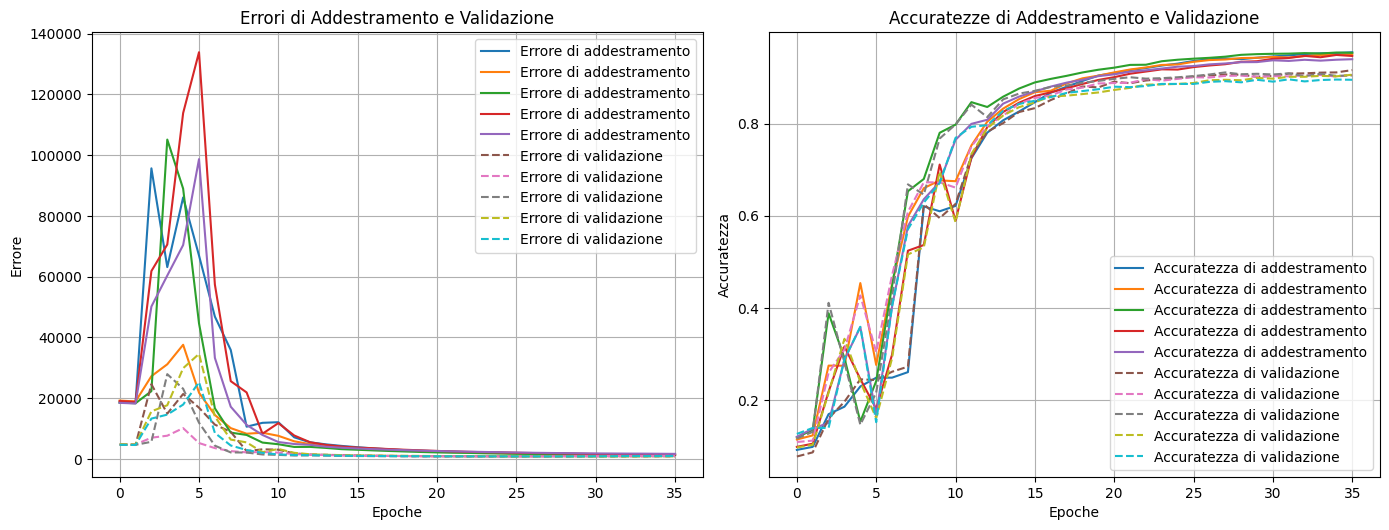

In [3]:
from src.nndlpy.NeuralNetwork import plot_metrics

# Inizializza due liste vuote per memorizzare i risultati e le reti addestrate
results_metrics = []
trained_networks = []

# Esegui il ciclo per il numero di reti specificato
for run in range(num_of_networks):
    # Clona la rete neurale corrente per l'addestramento
    training_network = neural_networks[run].clone_network()
    print(f'\n\n\nEsecuzione numero {run + 1}\n')

    # Addestramento utilizzando Rprop(Rprop può assumere i seguenti valori: STANDARD, RPROP_PLUS, IRPROP)
    metrics = training_network.train_model(train_X, train_Y, validation_X, validation_Y,
                                           num_epochs=epochs, learning_rate=learning_rate,
                                           rprop_method='STANDARD')

    # Salva la rete addestrata e i risultati
    trained_networks.append(training_network)
    results_metrics.append(metrics)

# Chiamata alla funzione di visualizzazione
plot_metrics(results_metrics)

In [4]:
# Calcola le metriche 
    # MAE (Mean Absolute Error - Errore Assoluto Medio) 
    # RMSE (Root Mean Squared Error - Errore Quadratico Medio),
    # Accuratezza 
# per le reti addestrate
std_mae, std_rmse, std_accuracy = NeuralNetwork.metrics_mae_rmse_accuracy(results_metrics, epochs, num_of_networks)

print("\nErrore Assoluto Medio:")
print(f"Media: {std_mae[-1]:.4f}")

print("\nErrore Quadratico Medio:")
print(f"Media: {std_rmse[-1]:.4f}")

print("\nAccuratezza:")
print(f"Media: {std_accuracy[-1]:.4f}")

MAE per ogni epoca:
Epoca 0: 14034.21175
Epoca 1: 13860.87546
Epoca 2: 38226.31587
Epoca 3: 49551.26453
Epoca 4: 58937.44183
Epoca 5: 54443.71154
Epoca 6: 25394.56581
Epoca 7: 14616.6013
Epoca 8: 8944.31384
Epoca 9: 6189.0072
Epoca 10: 6137.86376
Epoca 11: 4329.90432
Epoca 12: 3530.84073
Epoca 13: 3032.54675
Epoca 14: 2694.70642
Epoca 15: 2445.58219
Epoca 16: 2241.46413
Epoca 17: 2043.0729
Epoca 18: 1869.00755
Epoca 19: 1719.89402
Epoca 20: 1589.24373
Epoca 21: 1462.58385
Epoca 22: 1370.26336
Epoca 23: 1255.71467
Epoca 24: 1171.09235
Epoca 25: 1077.46302
Epoca 26: 986.29756
Epoca 27: 917.68886
Epoca 28: 866.73713
Epoca 29: 805.30962
Epoca 30: 734.87279
Epoca 31: 692.20966
Epoca 32: 628.1016
Epoca 33: 597.62145
Epoca 34: 551.49994
Epoca 35: 517.00942

RMSE per ogni epoca:
Epoca 0: 14034.21175
Epoca 1: 13860.87546
Epoca 2: 38226.31587
Epoca 3: 49551.26453
Epoca 4: 58937.44183
Epoca 5: 54443.71154
Epoca 6: 25394.56581
Epoca 7: 14616.6013
Epoca 8: 8944.31384
Epoca 9: 6189.0072
Epoca 10: 61